In [51]:
# тема проекта "Развитие хип-хоп культуры в республике Татарстан и Нижегородской области"

In [52]:
import vk  

In [53]:
token = "30dbd33230dbd33230dbd3324830a82cb6330db30dbd3326fbe2a0603563e0f72a6e9c2" 
session = vk.Session(access_token=token)  
vk_api = vk.API(session)  

In [54]:
personal_token = "e040ad8f8c95173eae22ea6ac92021cca459e27a16cd730e0b5d11d96d159f0c42f9ce603c04c80f369de"
session = vk.Session(access_token=personal_token)  
vk_personal_api = vk.API(session)  

In [55]:
def get_members(groupid, fields=('sex', 'bdate', 'city', 'country', 'domain')):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92)  
    data = first["items"]  
    count = first["count"] // 1000  
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
    return data

In [56]:
members = get_members ("aigelmusic")

In [57]:
aigelmusic_members = get_members ("aigelmusic")
len(aigelmusic_members)

35621

In [58]:
def save_members_to_file(filename, members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"] 
            first_name = member["first_name"] 
            last_name = member["last_name"] 
            
            sex = member["sex"] 
            if int(sex) == 1: 
                sex = "F"  
            elif int(sex) == 2:  
                sex = "M" 
            else:  
                sex = "-"  
                
            bdate = member.get('bdate', "-")   
            if len(bdate.split(".")) == 3:  
                bdate = bdate.split(".")[-1]  
            else:  
                bdate = "-"  
                
            city = member.get('city', {}).get("title", "-")  
            country = member.get('country', {}).get("title", "-")  
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")  

In [59]:
save_members_to_file ("aigelmusic_savemembers.tsv", members)

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
import pandas as pd

df = pd.read_csv("aigelmusic_savemembers.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [62]:
df.head(10)

,id,name,surname,sex,birth,city,country
0,"364,",Albert,Alexandrovich,M,-,Saint Petersburg,Russia
1,"636,",Alexander,Belyaev,M,1989,Pushkin,Russia
2,"2950,",Evgenya,Kovalchuk,F,-,-,-
3,"5674,",Vasya,Ugryumov,M,-,Saint Petersburg,Russia
4,"6873,",Yulia,Krishneva,F,-,-,-
5,"8001,",Inga,Petrova,F,-,Köln,Germany
6,"9968,",Denis,Morozov,M,-,Saint Petersburg,Russia
7,"10254,",DELETED,NaN,M,-,-,-
8,"11345,",Maxim,Stepakov,M,-,Moscow,Russia
9,"11782,",Alisa,Kobzun,F,-,Saint Petersburg,Russia


In [63]:
city_count  = df['city'].value_counts().drop('-') 
city_count = city_count[:20] 

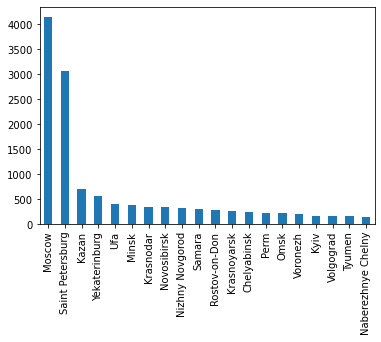

In [64]:
city_count.plot.bar() 
plt.show() 

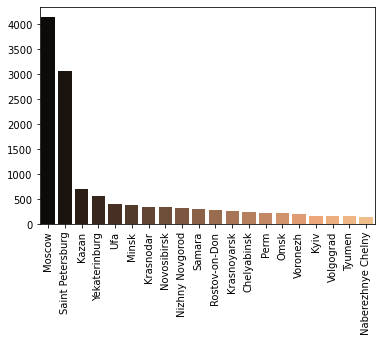

In [65]:
sns.barplot(city_count.index, city_count.values, palette='copper') 
plt.xticks(rotation=90) 
plt.show() 

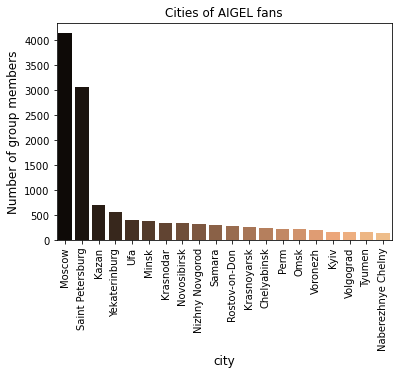

In [66]:
sns.barplot(city_count.index, city_count.values, palette='copper') 
plt.title('Cities of AIGEL fans')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.xticks(rotation=90) 
plt.show() 

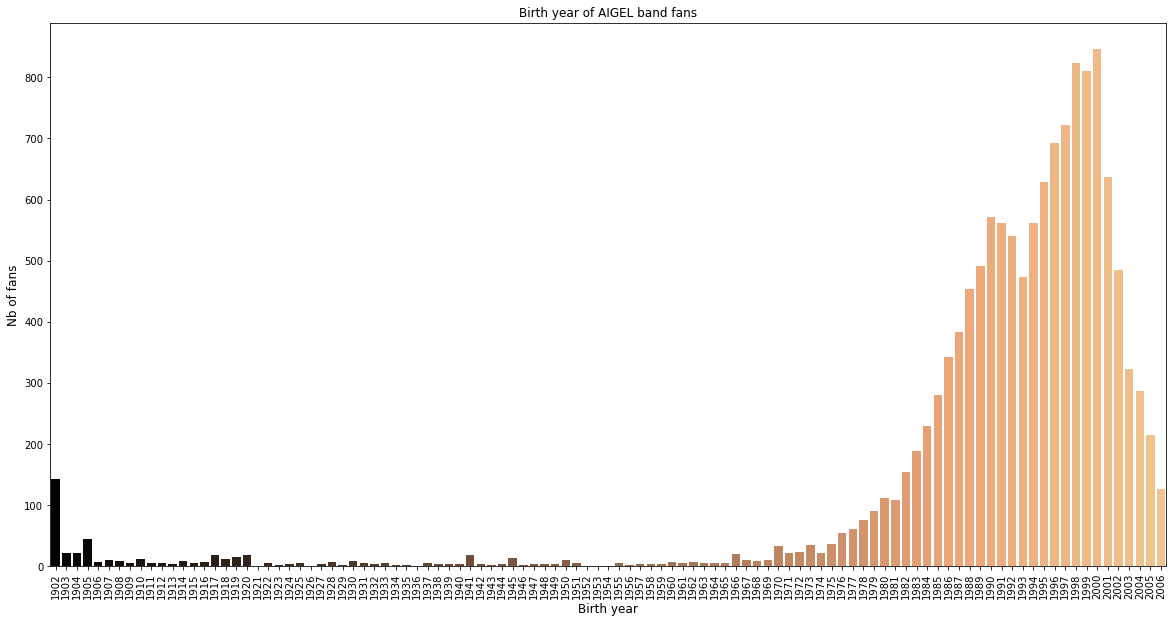

In [67]:
birth_count  = df['birth'].value_counts().drop('-')
plt.figure(figsize=(20,10))
ax = sns.barplot(birth_count.index, birth_count.values, palette='copper') 
plt.title('Birth year of AIGEL band fans')
plt.ylabel('Nb of fans', fontsize=12)
plt.xlabel('Birth year', fontsize=12)
plt.xticks(rotation=90) 
plt.show() 

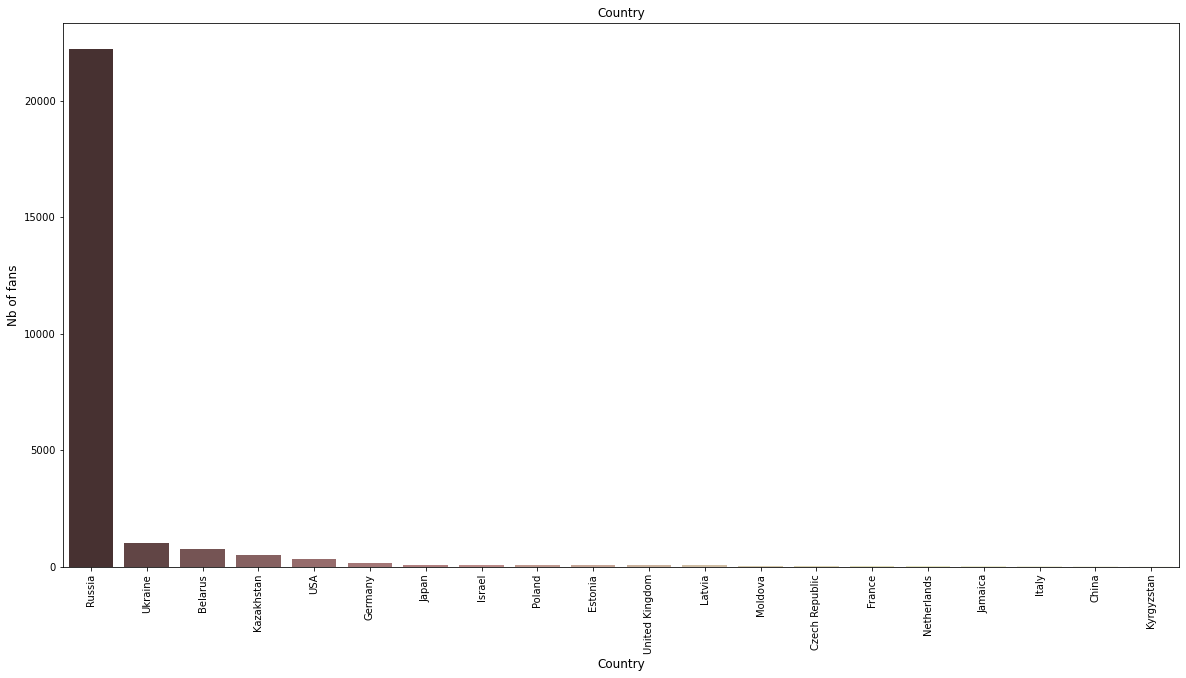

In [68]:
country_count = df["country"].value_counts().drop("-")
country_count = country_count [0:20]
plt.figure(figsize=(20,10))
ax = sns.barplot(country_count.index,country_count.values, palette="pink")
plt.title("Country")
plt.ylabel("Nb of fans", fontsize=12)
plt.xlabel("Country", fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [69]:
df.loc[(df['city'] == 'Moscow')] = "msk + spb"
df.loc[(df['city'] == 'Kazan')] = "msk + kzn"
df.loc[(df['city'] != "msk + kzn") & (df['city'] != "-")] = "province"

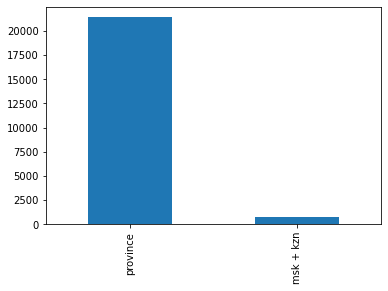

In [70]:
city_count  = df['city'].value_counts().drop('-') 
city_count = city_count[:20] 
axes = city_count.plot.bar() 

In [71]:
new_df = df[df['sex'].ne('-')] 
new_df['birth'] = pd.to_numeric(new_df['birth'], errors='coerce') 

<ipython-input-71-4f4bd87b4777>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['birth'] = pd.to_numeric(new_df['birth'], errors='coerce')


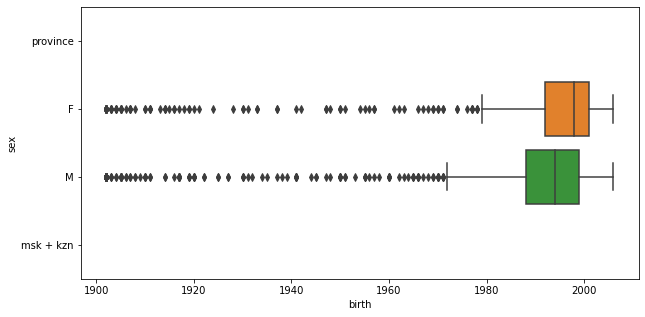

In [72]:
plt.figure(figsize=(10,5)) 
sns.boxplot(x="birth", y="sex", data=new_df) 
plt.show()

In [73]:
def get_posts(owner_id):
    first = vk_api.wall.get(domain=owner_id, count=100, filter="owner", v=5.124)
    data = first["items"]  
    count = first["count"] // 100  
    for i in range(1, count+1):  
        data += vk_api.wall.get(domain=owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
    return [i['text'] for i in data]

In [74]:
aigelmusic_posts=get_posts("aigelmusic")

In [75]:
for post in aigelmusic_posts[:10]:
    print (post)

Премьера!
АИГЕЛ — EP «Офигенно» 

Слушать везде: aplusmuz.ru/albums/aigel-ofigenno/

Mastered: [id52310062|Aleks]
Design: [id80170169|Max Kuzhegetov]

Сегодня день рождения у нашего дизайнера [id80170169|Макса Кужегетова]!

Мы уже говорили о том, сколько [https://vk.com/wall-142108710_6739|классных обложек] он сделал для нас. И мы скажем об этом снова, потому что Макс — очень крутой дизайнер и наш друг!

Макс, с днём рождения, офигенно, что ты с нами 🖤
Айгель, с днём рождения! 🖤
У нас две новости. 

— Концерт в Праге переносится на 18 февраля 2021 года
— Но уже сегодня в 20:00 мы проведём прямой эфир на странице DOX в Facebook, подключайтесь: vk.cc/aAm3i7

🖤
Продолжаем искать возможности увидеться с вами лично, приходите:

[club183432755|17 октября — Arkhangelsk Music Weeks]: amweeks.ru
[club198941716|12 декабря — большой концерт в Нижнем Новгороде]: vk.cc/aAagw7
Илья больше 20 лет крутит ручки синтезаторов и драм-машин, а в эту среду в эфире [club182191338|ИМИ] поделится своим опытом 

In [76]:
print (aigelmusic_posts)

['Премьера!\nАИГЕЛ — EP «Офигенно» \n\nСлушать везде: aplusmuz.ru/albums/aigel-ofigenno/\n\nMastered: [id52310062|Aleks]\nDesign: [id80170169|Max Kuzhegetov]', '', 'Сегодня день рождения у нашего дизайнера [id80170169|Макса Кужегетова]!\n\nМы уже говорили о том, сколько [https://vk.com/wall-142108710_6739|классных обложек] он сделал для нас. И мы скажем об этом снова, потому что Макс — очень крутой дизайнер и наш друг!\n\nМакс, с днём рождения, офигенно, что ты с нами 🖤', 'Айгель, с днём рождения! 🖤', 'У нас две новости. \n\n— Концерт в Праге переносится на 18 февраля 2021 года\n— Но уже сегодня в 20:00 мы проведём прямой эфир на странице DOX в Facebook, подключайтесь: vk.cc/aAm3i7\n\n🖤', 'Продолжаем искать возможности увидеться с вами лично, приходите:\n\n[club183432755|17 октября — Arkhangelsk Music Weeks]: amweeks.ru\n[club198941716|12 декабря — большой концерт в Нижнем Новгороде]: vk.cc/aAagw7', 'Илья больше 20 лет крутит ручки синтезаторов и драм-машин, а в эту среду в эфире [club

In [81]:
def save_posts_to_file(filename, post):
    with open(filename, 'w', encoding="utf-8") as f:
        f.write(post) 

In [89]:
aigelmusic_posts = get_posts("aigelmusic")

save_posts_to_file("aigelmusic_posts.tsv", aigelmusic)

In [90]:
import re 

In [91]:
aigelmusic = " "
for i in aigelmusic_posts:
    aigelmusic += str(i)
aigelmusic = re.sub('\[(id|club)\d*\|[А-Яа-я A-Za-z0-9ёЁ\-\,\@\(\)\"\'\:\«\»\|\$\^\&\*\’\.\`]*\]', '', aigelmusic)
concert_counter = re.findall(r'К|концерт', aigelmusic)
print(len(concert_counter))

319


In [40]:
!pip install natasha

  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13709 sha256=08d9efa84a139152fb4b7f1304045929715a37e76bc9d1aeb9eb8f493eb44e02
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\56\ea\58\ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt


In [43]:
from natasha import (Segmenter, MorphVocab, NewsEmbedding,
NewsMorphTagger, NewsSyntaxParser, NewsNERTagger, PER, NamesExtractor, Doc)

In [44]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb=NewsEmbedding()
morph_tagger=NewsMorphTagger(emb)
syntax_parser=NewsSyntaxParser(emb)
ner_tagger=NewsNERTagger(emb)
names_extractor=NamesExtractor(morph_vocab)